More advanced plotting - Quiescent binning and cumulative distributions below

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import glob
from astropy.io import fits
import sys
import os
from scipy.stats import binned_statistic, ks_2samp
import re

# functions
def perc(arr):
	a = np.array(arr)
	p = np.percentile(a, 25)
	return p
def perc2(arr):
	a = np.array(arr)
	p = np.percentile(a, 75)
	return p
def perc3(arr):
    a = np.array(arr)
    p = np.percentile(a, 50)
    return p
    
def zeropad(n,zeros=4):
    "Pad number n with zeros. Example: zeropad(7,3) == '007'"
    nstr = str(n)
    while len(nstr) < zeros:
        nstr = "0" + nstr
    return nstr

In [3]:
#filelists
sex_seg = glob.glob('/Users/Nick/IS/Source_Extractor/Segmentation_Maps_crop/*.fits')
print len(sex_seg)
filefits = glob.glob('/Users/Nick/IS/HST_Images/Cropped/*.fits')
print len(filefits)
filegal = glob.glob('/Users/Nick/IS/Galfit/MC/Output2/*.fits')
print len(filegal)
SExCAT_all = glob.glob('/Users/Nick/IS/Source_Extractor/Catalog_crop/*')
sky_smooth = glob.glob('/Users/Nick/IS/Sky_Image/*')
ds = pd.read_csv('/Users/Nick/IS/Datasets/catalog8_USE+sigma_sky', delim_whitespace = True)
ds2 = pd.read_csv('/Users/Nick/IS/Datasets/catalog10_post_MC_Galfit2.csv', delim_whitespace = True, skiprows = 13)
dsenv = pd.read_csv('/Users/Nick/IS/Datasets/Environment_1mpc_massden.csv', delim_whitespace = True)
#dsenv2 = pd.read_csv('/Users/Nick/IS/Datasets/Environment_200kpc.csv', delim_whitespace = True)
#dsenv3 = pd.read_csv('/Users/Nick/IS/Datasets/Environment_2mpc.csv', delim_whitespace = True)

3372
3372
3082


In [4]:
disk_re = ds2['disk_re']
bulge_re = ds2['bulge_re']
disk_mag = ds2['disk_mag']
bulge_mag = ds2['bulge_mag']
ba_ratiod = ds2['ba_ratio_disk']
ba_ratiob = ds2['ba_ratio_bulge']
LMASS = ds2['LMASS']
disk_kpc = ds2['disk_kpc']
bulge_kpc = ds2['bulge_kpc']
bulge_frac = ds2['bulge_frac']
SFR_TOT = ds2['SFR_tot']
SFR_UV = ds2['SFR_UV']
#SFR_IR = ds2['SFR_IR']
SSFR_TOT = np.log10(SFR_TOT) - LMASS
SSFR_UV = np.log10(SFR_UV) - LMASS
#SSFR_IR = np.log(SFR_IR) - LMASS
ENV = np.log10(dsenv['Mass Density'])
#ENV200 = np.log10(dsenv2['en_lst'])

In [5]:
def MCplot(xdata, ydata, xlabel, ylabel, fname, xmin = 0, 
           xmax = 1, ymin = -13, ymax = -7, bins = 'no', mapc = 'no', colorscale = bulge_frac
          ):
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)
    ax.set_xlabel('%s' % xlabel, fontsize = 17)
    ax.set_ylabel('%s' % ylabel, fontsize = 17)
    ax.set_ylim(ymin,ymax)
    ax.set_xlim(xmin,xmax)
    if mapc == 'no':
        ax.plot(xdata, ydata, linewidth = 0, alpha = 0.5, color = 'navy', marker = 'o', mew = 0)
        if bins == 'yes':
            ax.plot(x25,yplot, 'y', alpha = 1, ms = 3, mew = 3, linewidth = 2.5)
            ax.plot(x50,yplot, 'r', alpha = 1, ms = 3, mew = 3, linewidth = 2.5)
            ax.plot(x75, yplot, 'k', alpha = 1, ms = 3, mew = 3, linewidth = 2.5)
            plt.savefig('/Users/Nick/IS/Galfit/Plots/%s.pdf' %fname ,bbox_inches='tight')
            plt.show()
        if bins == 'no':
            plt.savefig('/Users/Nick/IS/Galfit/Plots/%s.pdf' %fname ,bbox_inches='tight')
            plt.show()
    elif mapc == 'yes':
        cax = ax.scatter(xdata, ydata, linewidth = 0, alpha = 0.5, c = colorscale, marker = 'o', cmap = 'jet')
        cbar = fig.colorbar(cax, ticks=[7.5, 8.0, 8.5, 9.0])
        cbar.ax.set_yticklabels(['7.5', '8.0', '8.5', '9.0'])
        ax.set_title('Environment colorbar')
        plt.savefig('/Users/Nick/IS/Galfit/Plots/%s.pdf' %fname ,bbox_inches='tight')
    

In [6]:
#bin function
def binnedplot(xdata, ydata, ymin, ymax, binn = 11):
    x25, y25, z25 = bin25 = binned_statistic(ydata, xdata, statistic=perc, bins=binn, range = (ymin,ymax))
    x50, y50, z50 = bin25 = binned_statistic(ydata, xdata, statistic=perc3, bins=binn, range = (ymin, ymax))
    x75, y75, z75 = bin25 = binned_statistic(ydata, xdata, statistic=perc2, bins=binn, range = (ymin,ymax))

    yplot = (y25[1]-y25[0])/2 + y25[0:binn]
    return x25, x50, x75, yplot



In [8]:
x25, x50, x75, yplot = binnedplot(bulge_frac, ENV, 7.0, 9.5, binn = 5)

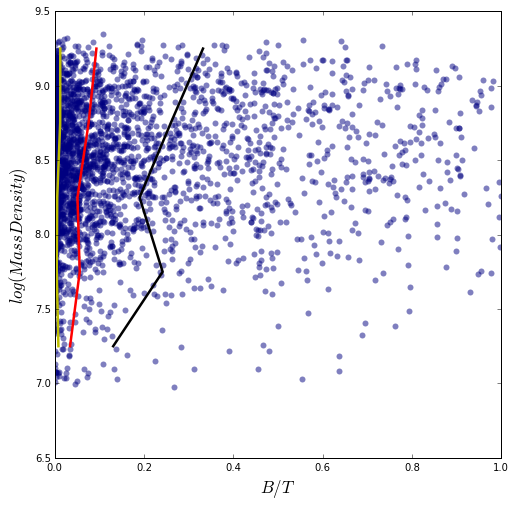

In [9]:
MCplot(bulge_frac, ENV, "$B/T$", "$log(Mass Density)$", "Environment vs. Bulge Frac", ymin = 6.5, ymax = 9.5, bins = 'yes')

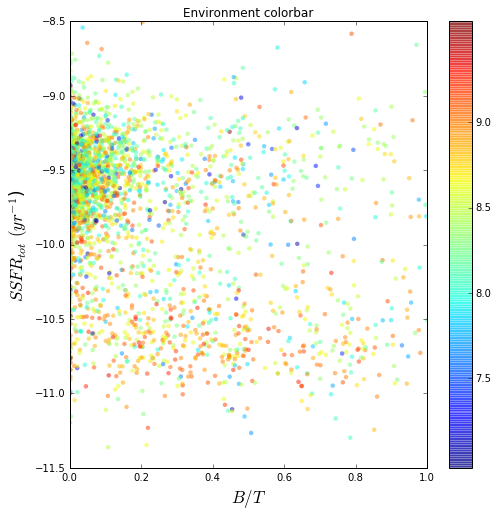

In [11]:
MCplot(bulge_frac, SSFR_TOT, '$B/T$','$SSFR_{tot} \ (yr^{-1}$)', "SSFR vs. Bulge Frac w Environment", ymin = -11.5, 
       ymax = -8.5, mapc = 'yes', 
       colorscale = ENV)

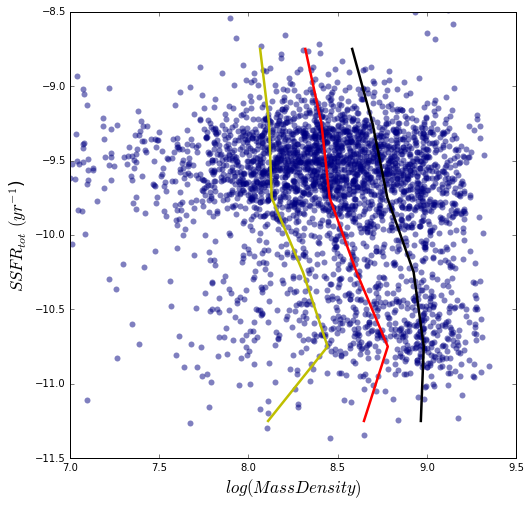

In [12]:
x25, x50, x75, yplot = binnedplot(ENV, SSFR_TOT, -11.5, -8.5, binn = 6)
MCplot(ENV, SSFR_TOT, "$log(Mass Density)$", '$SSFR_{tot} \ (yr^{-1}$)', "SSFR vs. Environment", ymin = -11.5, ymax = -8.5, 
       xmin = 7, xmax = 9.5, bins = 'yes')

In [6]:
#histograms
jj = LMASS < 9.5
j2 = LMASS >= 9.5
ml = LMASS[jj]
mh = LMASS[j2]
bl = bulge_frac[jj]
bh = bulge_frac[j2]

In [8]:
print len(mh)
print len(ml)

1237
1845


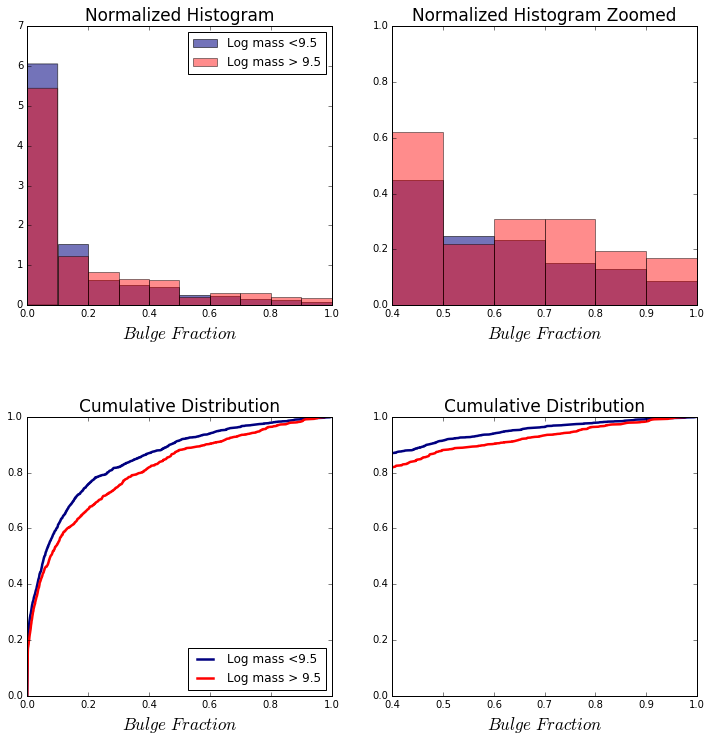

In [66]:
# the histogram of the data
binz = np.arange(0.0, 1.1, .1)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(12,12)

n, bins, patches = ax1.hist(bl, binz, normed=True, facecolor='navy', alpha=0.55)
n, bins, patches = ax1.hist(bh, binz, normed=True, facecolor='red', alpha=0.45, cumulative = False)

#ax1.set_ylim(0,700)
ax1.set_xlim(0.0,1)

n, bins, patches = ax2.hist(bl, binz, normed=True, facecolor='navy', alpha=0.55)
n, bins, patches = ax2.hist(bh, binz, normed=True, facecolor='red', alpha=0.45)

ax2.set_ylim(0,1)
ax2.set_xlim(0.4,1)
ax1.set_xlabel('$Bulge\ Fraction$', fontsize = 17)
ax2.set_xlabel('$Bulge\ Fraction$', fontsize = 17)
ax1.legend(('Log mass <9.5', 'Log mass > 9.5'), loc='upper right')
ax1.set_title('Normalized Histogram', fontsize = 17)
ax2.set_title('Normalized Histogram Zoomed', fontsize = 17)



xlow = np.sort(bl)
ylow = (np.arange(1.0, len(bl)+1))/len(bl)
xhigh = np.sort(bh)
yhigh = (np.arange(1.0, len(bh)+1))/len(bh)

ax3.plot(xlow, ylow, linewidth = 2.5, c = 'navy')
ax3.plot(xhigh, yhigh, linewidth = 2.5, c = 'red')


ax4.plot(xlow, ylow, linewidth = 2.5, c = 'navy')
ax4.plot(xhigh, yhigh, linewidth = 2.5, c = 'red')

ax3.legend(('Log mass <9.5', 'Log mass > 9.5'), loc='lower right')
#n, bins, patches = ax3.hist(bl, binz, normed=True, facecolor='navy', alpha=0.55, cumulative = True)
#n, bins, patches = ax3.hist(bh, binz, normed=True, facecolor='red', alpha=0.45, cumulative = True)

ax4.set_ylim(0,1)
ax3.set_xlim(0.0,1)
#n, bins, patches = ax4.hist(bl, binz, normed=True, facecolor='navy', alpha=0.55, cumulative = True)
#n, bins, patches = ax4.hist(bh, binz, normed=True, facecolor='red', alpha=0.45, cumulative = True)

ax3.set_ylim(0,1)
ax4.set_xlim(0.4,1)
ax3.set_xlabel('$Bulge\ Fraction$', fontsize = 17)
ax4.set_xlabel('$Bulge\ Fraction$', fontsize = 17)
ax3.set_title('Cumulative Distribution', fontsize = 17)
ax4.set_title('Cumulative Distribution', fontsize = 17)

fig.subplots_adjust(hspace=.4)

plt.savefig('/Users/Nick/IS/Galfit/Plots/mass_hist_cum_bulge.pdf', bbox_inches='tight')

In [91]:
print ks_2samp(bl, bh)

Ks_2sampResult(statistic=0.092542277080006063, pvalue=5.5241302517512089e-06)


In [47]:
sl = SSFR_TOT[jj]
sh = SSFR_TOT[j2]

[ 0.99783198  0.99837398  0.99891599  0.99945799  1.        ]
1845


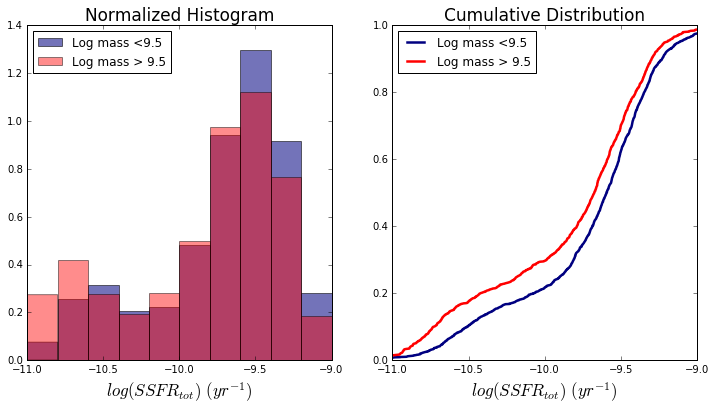

In [61]:
binz = np.arange(-11.0, -8.8,.2 )
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12,6)
n, bins, patches = ax1.hist(sl, binz, normed=True, facecolor='navy', alpha=0.55)
n, bins, patches = ax1.hist(sh, binz, normed=True, facecolor='red', alpha=0.45)
ax1.set_title('Normalized Histogram', fontsize = 17)
#ax1.set_ylim(0,150)
ax1.set_xlim(-11,-9)
ax1.set_xlabel('$log(SSFR_{tot}) \ (yr^{-1})$', fontsize = 17)
ax1.legend(('Log mass <9.5', 'Log mass > 9.5'), loc='upper left')

xlow = np.sort(sl)
ylow = (np.arange(1.0, len(sl)+1))/len(sl)
xhigh = np.sort(sh)
yhigh = (np.arange(1.0, len(sh)+1))/len(sh)
#n, bins, patches = ax2.hist(sl, binz, normed=True, facecolor='navy', alpha=0.55, cumulative = True)
#n, bins, patches = ax2.hist(sh, binz, normed=True, facecolor='red', alpha=0.45, cumulative = True)
ax2.plot(xlow, ylow, linewidth = 2.5, c = 'navy')
ax2.plot(xhigh, yhigh, linewidth = 2.5, c = 'red')
ax2.set_xlabel('$log(SSFR_{tot}) \ (yr^{-1})$', fontsize = 17)
ax2.set_title('Cumulative Distribution', fontsize = 17)
ax2.set_xlim(-11, -9)
ax2.legend(('Log mass <9.5', 'Log mass > 9.5'), loc='upper left')
plt.savefig('/Users/Nick/IS/Galfit/Plots/mass_hist_cuml.pdf', bbox_inches='tight')
print xi[-5:]
print len(sl)

In [92]:
print ks_2samp(sl, sh)

Ks_2sampResult(statistic=0.10452773889097011, pvalue=1.6186529927376965e-07)


In [38]:
#adding information about galaxy environment to current dataset - ensuring compatibility with current data and 
#putting environment in log10 units
xx = dsenv['en_lst'] 
ENV = []
for val in xx:
    if val != 0:
        ENV.append(np.log10(val))
    elif val == 0:
        ENV.append(0)
xx2 = dsenv2['en_lst'] 
ENV2 = []
for val in xx2:
    if val != 0:
        ENV2.append(np.log10(val))
    elif val == 0:
        ENV2.append(0)
xxm = dsenv3['en_lst'] 
ENV2m = []
for val in xxm:
    if val != 0:
        ENV2m.append(np.log10(val))
    elif val == 0:
        ENV2m.append(0)

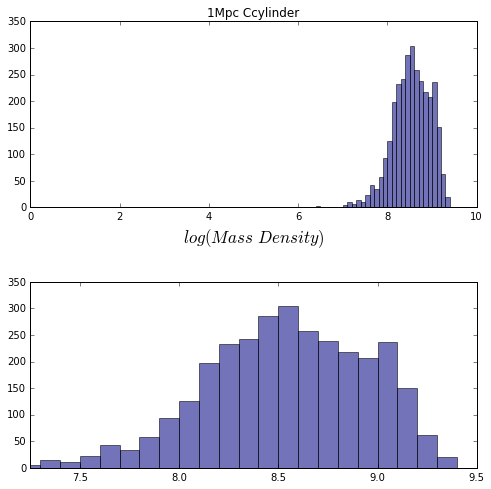

In [36]:
binz = np.arange(0, 10,.1 )
fig, (ax2, ax1) = plt.subplots(2, 1)
fig.set_size_inches(8,8)
n, bins, patches = ax1.hist(ENV, binz, normed=False, facecolor='navy', alpha=0.55)
#n, bins, patches = ax1.hist(sh, binz, normed=False, facecolor='red', alpha=0.45)
ax1.set_ylim(0,350)
ax1.set_xlim(7.25, 9.50)
ax2.set_xlabel('$log(Mass\ Density)$', fontsize = 17)
n, bins, patches = ax2.hist(ENV, binz, normed=False, facecolor='navy', alpha=0.55)
#ax2.legend('1mpc cylinder', loc='upper left')
ax2.set_title('1Mpc Ccylinder')
fig.subplots_adjust(hspace=.4)
plt.savefig('/Users/Nick/IS/Galfit/Plots/env_hist_v.1.pdf', bbox_inches='tight')

In [37]:
#bulge fraction slice
b11 = bulge_frac <= 0.1
b22 = bulge_frac > 0.1
SS1 = SSFR_TOT[b11]
es = pd.Series(ENV)
el = es[b11]
eh = es[b22]
#eh = np.array(ENV)[b22]

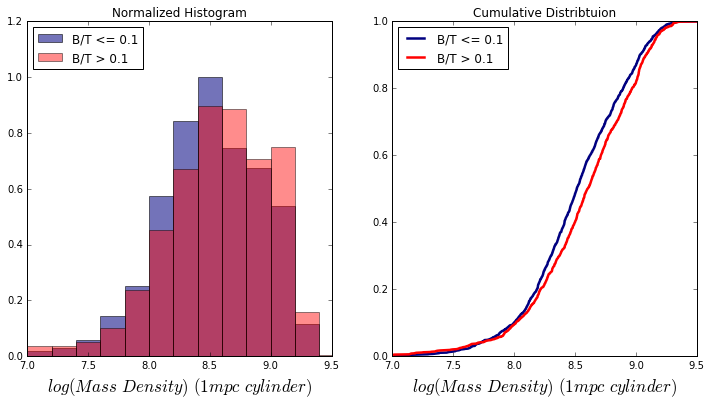

In [77]:
binz = np.arange(0, 10.5,.2 )
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12,6)
n, bins, patches = ax1.hist(el, binz, normed=True, facecolor='navy', alpha=0.55)
n, bins, patches = ax1.hist(eh, binz, normed=True, facecolor='red', alpha=0.45)
#ax1.set_ylim(0,200)
ax1.set_xlim(7.0,9.5)
ax1.set_xlabel('$log(Mass\ Density) \ (1mpc\ cylinder)$', fontsize = 17)
ax1.legend(('B/T <= 0.1', 'B/T > 0.1'), loc='upper left')
ax1.set_title('Normalized Histogram')


xlow = np.sort(el)
ylow = (np.arange(1.0, len(el)+1))/len(el)
xhigh = np.sort(eh)
yhigh = (np.arange(1.0, len(eh)+1))/len(eh)
ax2.plot(xlow, ylow, linewidth = 2.5, c = 'navy')
ax2.plot(xhigh, yhigh, linewidth = 2.5, c = 'red')
ax2.set_xlabel('$log(Mass\ Density) \ (1mpc\ cylinder)$', fontsize = 17)
ax2.set_xlim(7.0,9.5)
ax2.set_title('Cumulative Distribtuion')
ax2.legend(('B/T <= 0.1', 'B/T > 0.1'), loc='upper left')
fig.subplots_adjust(hspace=.4)
plt.savefig('/Users/Nick/IS/Galfit/Plots/bulge_hist_cuml.pdf', bbox_inches='tight')

In [93]:
print ks_2samp(el, eh)

Ks_2sampResult(statistic=0.0895541103827594, pvalue=1.0626823747107643e-05)


In [7]:
#selecting quiescent galaxies
# selecting QG
UV_coords=np.array([1.3,2.01])
VJ_coords=np.array([0.693,1.5])
jj_qg=( (ds2['z_peak']>=0.) & (ds2['z_peak']<1.0) & 
(ds2['UmV']>UV_coords[0]) & (ds2['VmJ']<VJ_coords[1]) & 
(ds2['UmV']>np.poly1d(np.polyfit(VJ_coords,UV_coords,1))(ds2['VmJ']) 
) )
print len(jj_qg)

3082


In [8]:
#selecting SFG
jj_sfg=( (ds2['z_peak']>=0.) & (ds2['z_peak']<1.0) & 
(ds2['UmV']<UV_coords[0]) | (ds2['VmJ']>VJ_coords[1]) | 
(ds2['UmV']<np.poly1d(np.polyfit(VJ_coords,UV_coords,1))(ds2['VmJ']) 
) )

In [9]:
jj = LMASS < 9.5
j2 = LMASS >= 9.5
#bulge fraction
SFG_lm_bt = bulge_frac[jj_sfg&jj]
SFG_hm_bt = bulge_frac[jj_sfg&j2]
QG_lm_bt = bulge_frac[jj_qg&jj]
QG_hm_bt = bulge_frac[jj_qg&j2]
#environment
ENV = pd.Series(ENV)
SFG_lm_env = ENV[jj_sfg&jj]
SFG_hm_env = ENV[jj_sfg&j2]
QG_lm_env = ENV[jj_qg&jj]
QG_hm_env = ENV[jj_qg&j2]




In [17]:
print len(QG_lm_bt)
print len(QG_hm_bt)
print jj_sfg[0]
print ds2['z_peak'][0], ds2['LMASS'][0]

292
292
True
0.348 9.24


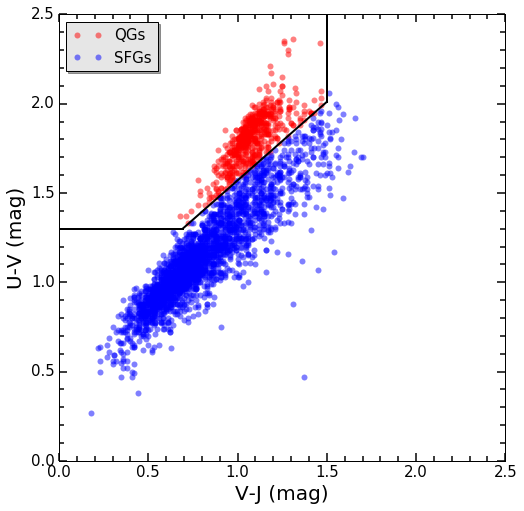

In [10]:
#U-V Against V-J with boundry, showing QG and SFGs
plt.figure(figsize=(8,8))

vmjQG = ds2['VmJ'][jj_qg]
umvQG = ds2['UmV'][jj_qg]

vmjSFG = ds2['VmJ'][jj_sfg]
umvSFG = ds2['UmV'][jj_sfg]

plotQG = plt.plot(vmjQG, umvQG, "ro", alpha = .5, mew = 0)
plotSFG = plt.plot(vmjSFG, umvSFG, "bo", alpha = .5, mew = 0)
# give plot a title
# make axis labels
plt.xlabel("V-J (mag)", fontsize = 20)
plt.ylabel("U-V (mag)", fontsize = 20)
legend = plt.legend(("QGs", "SFGs"),loc='upper left', shadow=True, fontsize = 15)
plt.xlim(0,2.5)
# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.plot([0, 0.693], [1.3, 1.3], color='k', linestyle='-', linewidth=2)
plt.plot([0.693, 1.5], [1.3, 2.01], color='k', linestyle='-', linewidth=2)
plt.plot([1.5, 1.5], [2.01, 2.5], color='k', linestyle='-', linewidth=2)

plt.minorticks_on()
plt.tick_params(axis='both',which='minor',length=5,width=1.5,labelsize=15)
plt.tick_params(axis='both',which='major',length=8,width=1.5,labelsize=15)
plt.savefig('/Users/Nick/IS/Galfit/Plots/uv_vj2.pdf', bbox_inches='tight')

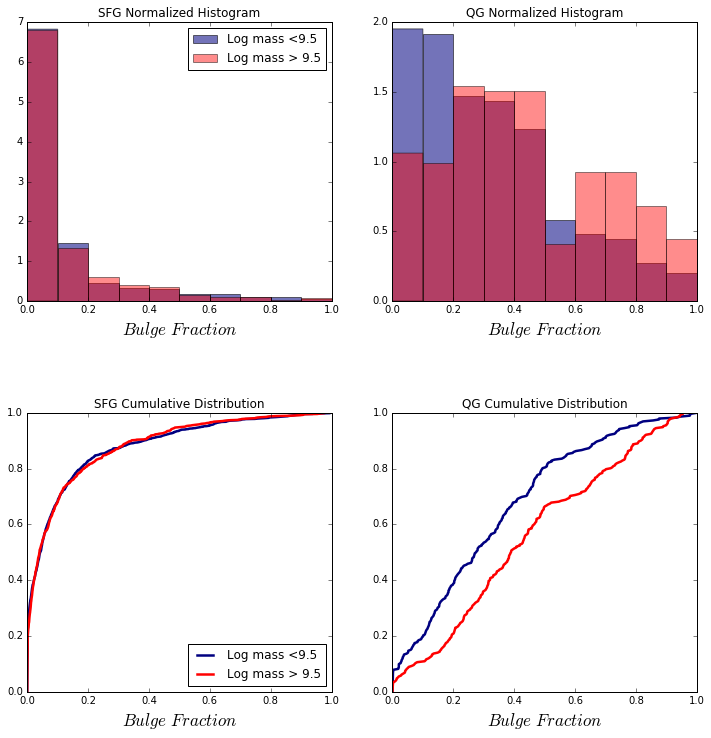

In [86]:
# the histogram of the data
binz = np.arange(0.0, 1.1, .1)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(12,12)

n, bins, patches = ax1.hist(SFG_lm_bt, binz, normed=True, facecolor='navy', alpha=0.55)
n, bins, patches = ax1.hist(SFG_hm_bt, binz, normed=True, facecolor='red', alpha=0.45)
ax1.set_xlim(0.0,1)
ax1.set_title('SFG Normalized Histogram')
n, bins, patches = ax2.hist(QG_lm_bt, binz, normed=True, facecolor='navy', alpha=0.55)
n, bins, patches = ax2.hist(QG_hm_bt, binz, normed=True, facecolor='red', alpha=0.45)
ax2.set_title('QG Normalized Histogram')
ax2.set_xlim(0,1)
ax1.set_xlabel('$Bulge\ Fraction$', fontsize = 17)
ax2.set_xlabel('$Bulge\ Fraction$', fontsize = 17)
ax1.legend(('Log mass <9.5', 'Log mass > 9.5'), loc='upper right')


xlows = np.sort(SFG_lm_bt)
ylows = (np.arange(1.0, len(SFG_lm_bt)+1))/len(SFG_lm_bt)
xhighs = np.sort(SFG_hm_bt)
yhighs = (np.arange(1.0, len(SFG_hm_bt)+1))/len(SFG_hm_bt)

ax3.plot(xlows, ylows, linewidth = 2.5, c = 'navy')
ax3.plot(xhighs, yhighs, linewidth = 2.5, c = 'red')
ax3.legend(('Log mass <9.5', 'Log mass > 9.5'), loc='lower right')


xlowq = np.sort(QG_lm_bt)
ylowq = (np.arange(1.0, len(QG_lm_bt)+1))/len(QG_lm_bt)
xhighq = np.sort(QG_hm_bt)
yhighq = (np.arange(1.0, len(QG_hm_bt)+1))/len(QG_hm_bt)

ax4.plot(xlowq, ylowq, linewidth = 2.5, c = 'navy')
ax4.plot(xhighq, yhighq, linewidth = 2.5, c = 'red')






#n, bins, patches = ax3.hist(SFG_lm_bt, binz, normed=True, facecolor='navy', alpha=0.55, cumulative = True)
#n, bins, patches = ax3.hist(SFG_hm_bt, binz, normed=True, facecolor='red', alpha=0.45, cumulative = True)
ax3.set_xlim(0.0,1)
ax3.set_title('SFG Cumulative Distribution')
#n, bins, patches = ax4.hist(QG_lm_bt, binz, normed=True, facecolor='navy', alpha=0.55, cumulative = True)
#n, bins, patches = ax4.hist(QG_hm_bt, binz, normed=True, facecolor='red', alpha=0.45, cumulative = True)
ax4.set_title('QG Cumulative Distribution')
ax3.set_xlabel('$Bulge\ Fraction$', fontsize = 17)
ax4.set_xlabel('$Bulge\ Fraction$', fontsize = 17)
fig.subplots_adjust(hspace=.4)
plt.savefig('/Users/Nick/IS/Galfit/Plots/2.SFG_QG_BT_cuml.pdf', bbox_inches='tight')

In [94]:
print ks_2samp(SFG_lm_bt, SFG_hm_bt)
print ks_2samp(QG_lm_bt, QG_hm_bt)

Ks_2sampResult(statistic=0.040625244875083871, pvalue=0.28114562829840178)
Ks_2sampResult(statistic=0.1952054794520548, pvalue=2.3171060128794022e-05)


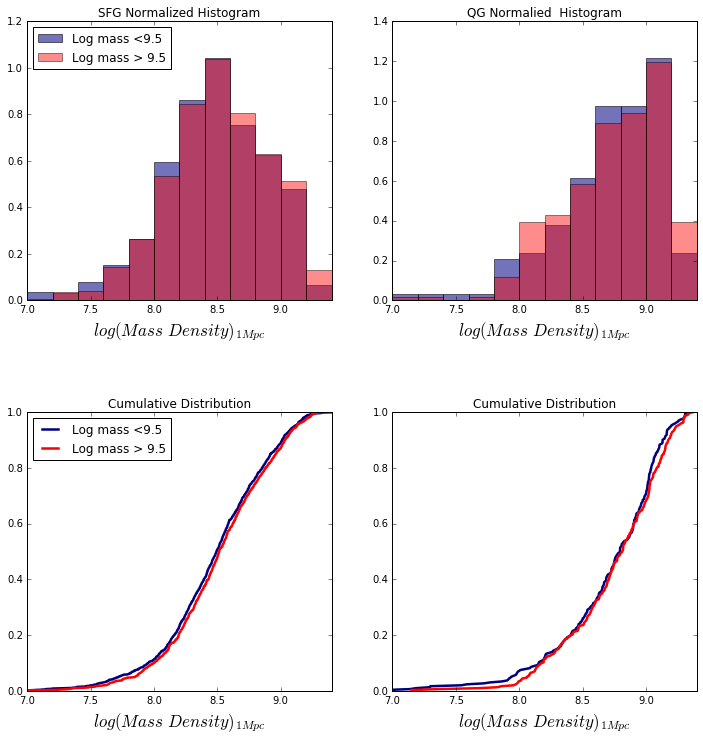

In [89]:
# the histogram of the data
binz = np.arange(0, 10.5,.2 )
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(12,12)
n, bins, patches = ax1.hist(SFG_lm_env, binz, normed=True, facecolor='navy', alpha=0.55)
n, bins, patches = ax1.hist(SFG_hm_env, binz, normed=True, facecolor='red', alpha=0.45)
ax1.set_xlim(7,9.4)
ax1.set_title('SFG Normalized Histogram')
n, bins, patches = ax2.hist(QG_lm_env, binz, normed=True, facecolor='navy', alpha=0.55)
n, bins, patches = ax2.hist(QG_hm_env, binz, normed=True, facecolor='red', alpha=0.45)
ax2.set_title('QG Normalied  Histogram')
ax2.set_xlim(7,9.4)
ax1.set_xlabel('$log(Mass\ Density)_{1Mpc}$', fontsize = 17)
ax2.set_xlabel('$log(Mass\ Density)_{1Mpc}$', fontsize = 17)
ax1.legend(('Log mass <9.5', 'Log mass > 9.5'), loc='upper left')


xlows = np.sort(SFG_lm_env)
ylows = (np.arange(1.0, len(SFG_lm_env)+1))/len(SFG_lm_env)
xhighs = np.sort(SFG_hm_env)
yhighs = (np.arange(1.0, len(SFG_hm_env)+1))/len(SFG_hm_env)

ax3.plot(xlows, ylows, linewidth = 2.5, c = 'navy')
ax3.plot(xhighs, yhighs, linewidth = 2.5, c = 'red')
ax3.legend(('Log mass <9.5', 'Log mass > 9.5'), loc='upper left')


xlowq = np.sort(QG_lm_env)
ylowq = (np.arange(1.0, len(QG_lm_env)+1))/len(QG_lm_env)
xhighq = np.sort(QG_hm_env)
yhighq = (np.arange(1.0, len(QG_hm_env)+1))/len(QG_hm_env)

ax4.plot(xlowq, ylowq, linewidth = 2.5, c = 'navy')
ax4.plot(xhighq, yhighq, linewidth = 2.5, c = 'red')


#n, bins, patches = ax3.hist(SFG_lm_env, binz, normed=False, facecolor='navy', alpha=0.55)
#n, bins, patches = ax3.hist(SFG_hm_env, binz, normed=False, facecolor='red', alpha=0.45)
ax3.set_xlim(7,9.4)
#n, bins, patches = ax4.hist(QG_lm_env, binz, normed=False, facecolor='navy', alpha=0.55)
#n, bins, patches = ax4.hist(QG_hm_env, binz, normed=False, facecolor='red', alpha=0.45)
ax4.set_xlim(7,9.4)
ax3.set_xlabel('$log(Mass\ Density)_{1Mpc}$', fontsize = 17)
ax4.set_xlabel('$log(Mass\ Density)_{1Mpc}$', fontsize = 17)
ax3.set_title('Cumulative Distribution')
ax4.set_title('Cumulative Distribution')
fig.subplots_adjust(hspace=.4)
plt.savefig('/Users/Nick/IS/Galfit/Plots/SFG_QG_ENV_cuml.pdf', bbox_inches='tight')

In [95]:
print ks_2samp(SFG_lm_env, SFG_hm_env)
print ks_2samp(QG_lm_env, QG_hm_env)

Ks_2sampResult(statistic=0.039564318250731645, pvalue=0.31071382742531833)
Ks_2sampResult(statistic=0.068493150684931448, pvalue=0.48613306777758236)
